# Customer Service Request in Seattle

## Goal 
1. Investigate service request situation in Seattle through 2021 to current.
2. Use python to manipulate data and visualize analysis.
3. Acknowledge how well handled service request in Seattle

## Questions to Answer

1. What are most requested services?
2. Service request distribution by Zip code
3. What are yearly trend of service requests?
4. Which methods are commonly used by citizen?
5. What are the status of progress?

I obtained this dataset from [here](https://catalog.data.gov/dataset/customer-service-requests).
This data set contains service requests information in Seattle from 2021 to 2025. 



### Import libraries and cleaned data by removing unnecessary columns.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt  

from matplotlib.ticker import PercentFormatter, FuncFormatter

# import Zip code as string
df_original = pd.read_csv(r'C:\Users\Dell\DA_FILE\100_My_Project\8_Service_request\Customer_Service_Requests.csv', dtype={12 : object})

sns.set_style('ticks')

# Remove unnecessary columns
df = df_original[['Service Request Number', 'Service Request Type', 'City Department',
       'Created Date', 'Method Received', 'Status',  'ZIP Code']].copy()
df.loc[:,'date'] =pd.to_datetime(df['Created Date'])

### Most requested service type
- Create Dataframe by count number of service request per request type and changed to percentage

In [4]:
df_type = df.groupby('Service Request Type')['Service Request Number'].count().reset_index().sort_values(by='Service Request Number',ascending=False)
df_type['percent'] = df_type['Service Request Number'].div(len(df)/100)

Visualize as a horizontal bar chart top 5 service request type as percentage

In [5]:
# Edit legend labels for visibility 
legend_labels = ['Abandoned Vehicle/ \n72hr Parking Ordinance', 
 'Parking Enforcement',
 'Unauthorized Encampment',
 'Illegal Dumping/ \nNeedles',
   'Graffiti']

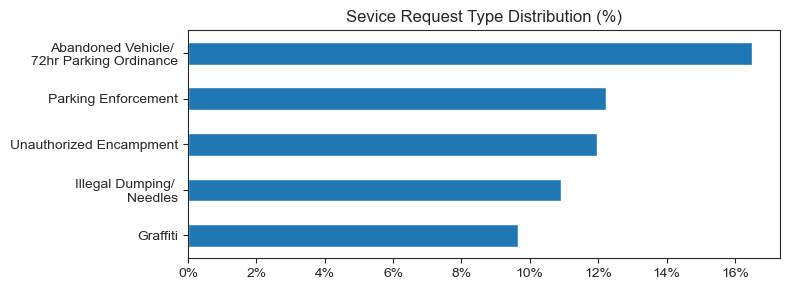

In [6]:
df_type.head().plot(kind='barh',y='percent', x='Service Request Type', figsize=(8,3))

plt.gca().invert_yaxis()
plt.title("Sevice Request Type Distribution (%)")
plt.legend().remove()
plt.ylabel("")
plt.gca().set_yticklabels(legend_labels)
plt.gca().xaxis.set_major_formatter(PercentFormatter(decimals=0))
plt.tight_layout()
plt.show()

### Yearly trend of Service Request
- First, to explore data as timely trend, set YYYY-MM date as 'year' column and set YYYY date as 'Y'.

In [7]:
# Prepare time data to analyse
df['year']=df['date'].dt.to_period('M')
df['Y']=df['date'].dt.year

Count total number of service request monthly and visualize by using rolling method, use previous 12 months average to plot as a smoother line chart.

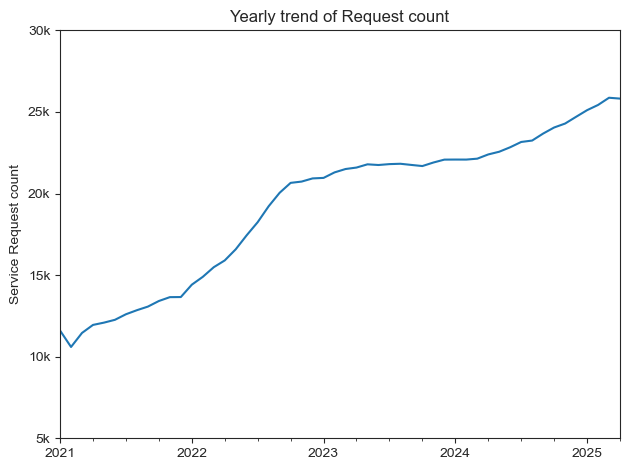

In [8]:
# Plot with previous 12 months average 
df.groupby('year')['Service Request Number'].count().rolling(window=12, min_periods=1).mean().plot(kind='line')

plt.ylabel('Service Request count')
plt.title('Yearly trend of Request count')
plt.xlabel('')
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, pos : f'{(x/1000):.0f}k'))
plt.ylim(5000,30000)
plt.tight_layout()
plt.show()

In 2021, the request was about 10K, but in 2025, it became around 25k, this is almost double amount.

### Top 5 requested city department
- Look up service request distribution per department

Create new DataFrame `df_top_dep` which count total number of service request, also calculate percentage to show total distribution.

In [ ]:
df_top_dep = df['City Department'].value_counts().sort_values(ascending=False).head().to_frame()
df_top_dep['perc']= df_top_dep.div((df['City Department'].value_counts().sum())/100)

In [ ]:
# for better visibility, remove shorten name of departments
split_name=[]
for i in range(5):
    split_name.append(df_top_dep.index[i].split(sep='-')[1])

Plot horizontal bar chart of total service request count.

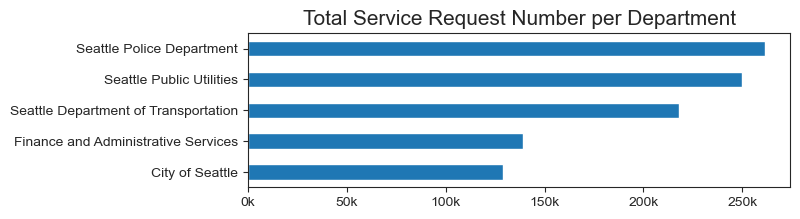

In [47]:
df_top_dep['count'].plot(kind='barh', figsize= (7,2)).invert_yaxis()
plt.ylabel('')
plt.gca().set_yticklabels(split_name)
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, pos : f'{(x/1000):.0f}k'))
plt.title('Total Service Request Number per Department',fontsize=15)
plt.show()

Plot horizontal bar chart of total service request count as percentage.

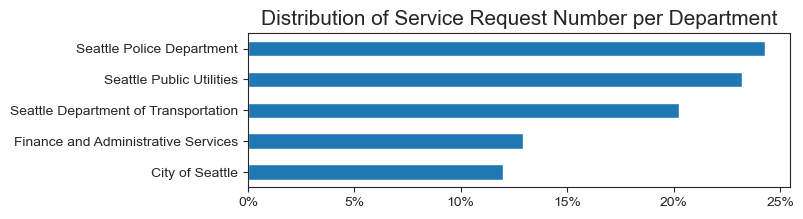

In [48]:
df_top_dep['perc'].plot(kind='barh', figsize= (7,2)).invert_yaxis()
plt.ylabel('')
plt.gca().set_yticklabels(split_name)
plt.gca().xaxis.set_major_formatter(PercentFormatter(decimals=0))
plt.title('Distribution of Service Request Number per Department',fontsize=15)
plt.show()

### 4. Are there specific hour?


In [49]:
df['hour']=df['date'].dt.hour

In [50]:
import matplotlib.ticker as ticker

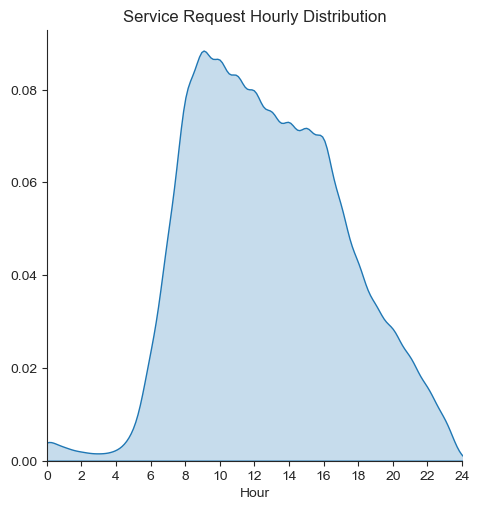

In [55]:
sns.displot(df['hour'],kind='kde', fill=True, bw_adjust=2)

plt.xlim(0,24)
plt.title('Service Request Hourly Distribution')
plt.ylabel('')
plt.xlabel('Hour')
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(2))

Between 8am to 6pm, most services are requested.
